In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


# Data source
# https://www.kaggle.com/c/home-data-for-ml-course/data



SalePrice - prediction target

Let's use the following features
- YearBuilt: Original construction date
- GarageArea: Size of garage in square feet
- LotArea: Lot size in square feet
- OverallQual: Overall material and finish quality
- ExterQual: Exterior material quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- TotalBsmtSF: Total square feet of basement area
- 2ndFlrSF: Second floor square feet

In [83]:
# Load data and number of columns

df_train = pd.read_csv('class5_house_price_prediction_train.csv')
print(df_train.shape)
print(list(df_train.columns))

# keep selected columns
df_train = df_train[['YearBuilt', 'GarageArea', 'LotArea', 'OverallQual', 'ExterQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF','SalePrice']]

(1460, 81)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

In [84]:
df_train.columns

Index(['YearBuilt', 'GarageArea', 'LotArea', 'OverallQual', 'ExterQual',
       'GrLivArea', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'SalePrice'],
      dtype='object')

In [85]:
df_train.dtypes

YearBuilt       int64
GarageArea      int64
LotArea         int64
OverallQual     int64
ExterQual      object
GrLivArea       int64
GarageCars      int64
TotalBsmtSF     int64
2ndFlrSF        int64
SalePrice       int64
dtype: object

In [86]:
print(df_train['ExterQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


In [87]:
# deal with missing values
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
df_train[numeric_cols] = df_train[numeric_cols].fillna(df_train[numeric_cols].median())

In [88]:
# Convert categorical variables to one-hot encoding
categorical_columns = ['ExterQual']  # Assuming 'Num Bedrooms' is categorical
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate encoded columns with the original DataFrame
df_train = pd.concat([df_train.drop(columns=categorical_columns), encoded_df], axis=1)

In [89]:
df_train.columns

Index(['YearBuilt', 'GarageArea', 'LotArea', 'OverallQual', 'GrLivArea',
       'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'SalePrice', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA'],
      dtype='object')


Linear Regression MSE: 37160.27185248663
Single Tree MSE: 38575.45613910719
Random Forest MSE: 30820.184486347724


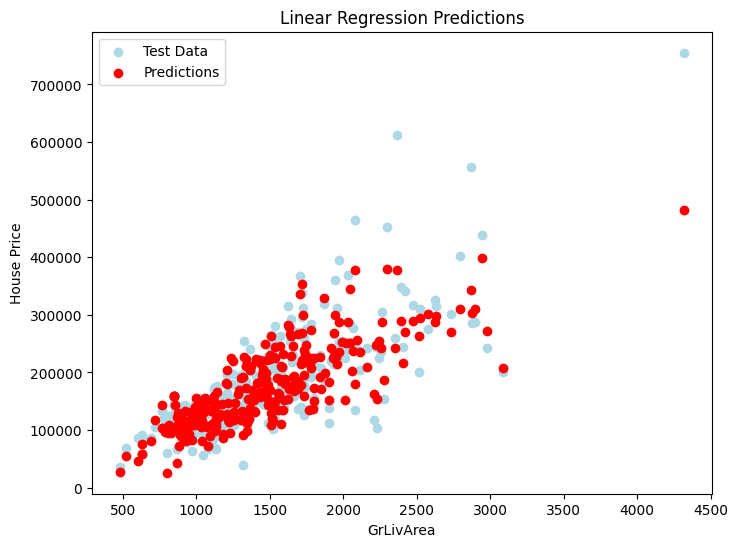

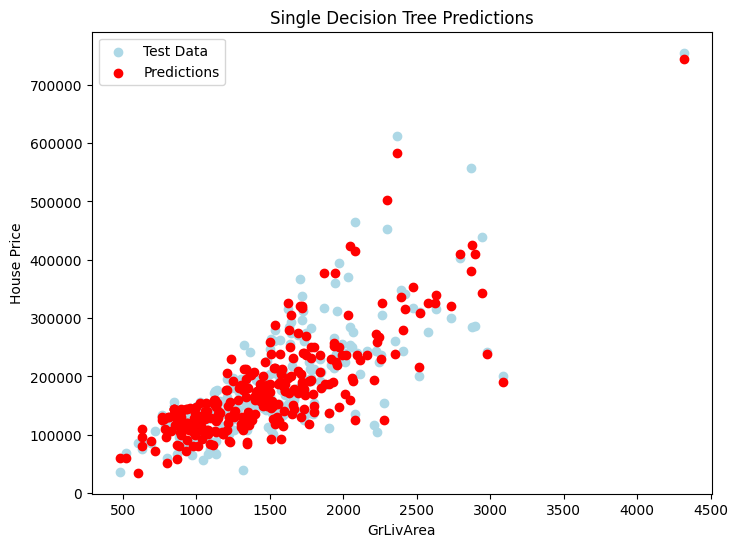

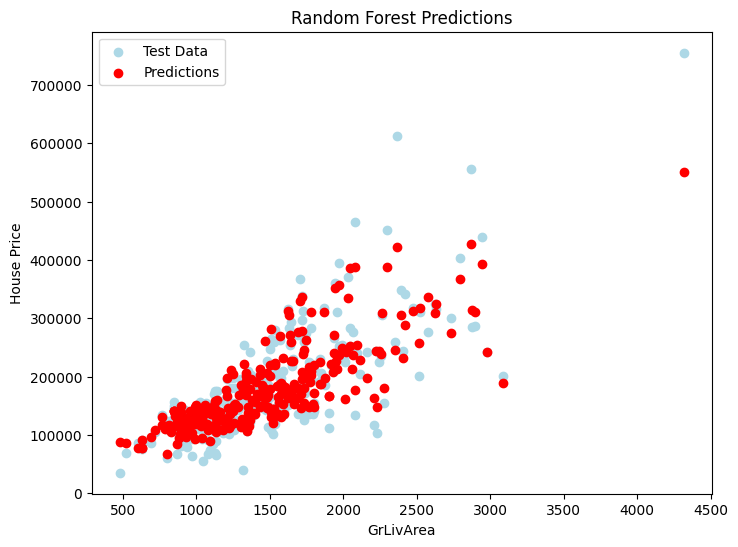

In [91]:
# Train-test split
X = df_train.drop(columns=["SalePrice"])
y = df_train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Train a single decision tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

# Train a Random Forest model
# random_forest = RandomForestRegressor(n_estimators=5, max_features='sqrt', random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, max_features='sqrt', min_samples_split=5, min_samples_leaf=2, n_jobs=-1, oob_score=True, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Print MSE results
print(f"\nLinear Regression MSE: {lr_rmse}")
print(f"Single Tree MSE: {tree_rmse}")
print(f"Random Forest MSE: {rf_rmse}")

# Scatter plots for visualization
def plot_results(model_name, y_pred):
    plt.figure(figsize=(8, 6))
    # plt.scatter(X_train["SalePrice"], y_train, color='blue', label='Train Data')
    plt.scatter(X_test["GrLivArea"], y_test, color='lightblue', label='Test Data')
    plt.scatter(X_test["GrLivArea"], y_pred, color='red', label='Predictions')
    plt.xlabel("GrLivArea")
    plt.ylabel("House Price")
    plt.title(f"{model_name} Predictions")
    plt.legend()
    plt.show()

plot_results("Linear Regression", lr_predictions)
plot_results("Single Decision Tree", tree_predictions)
plot_results("Random Forest", rf_predictions)